OK. We've spent some time thinking about how to get and work with data, but we haven't really touched on what you can do with data once you have it. The reason for this is that data munging and data analysis are really two separate concepts in their own way. And the kinds of analysis you can perform on data are as vast as the types of data you could find. As a digital humanist, you might be interested in any number of things: georeferencing, statistical measurements, network analysis, or many more. And, then, once you've analyzed things, you'll likely want to visualize your results. For the purposes of showing you what you can do with Python, we will just barely scratch the surface of these areas by showing some very basic methods. We will then visualize our results, which will hopefully show how you can use programming to carry out interpretations. Our goal here will be to use some of the data from the previous lesson on web scraping. Since the previous data was text, we will be working with basic text analysis to analyze author style by word counts.

First let's get the data we need by copying over some of the work that we did last time. First we will import the modules that we need. Then we will use Beautiful Soup to scrape down the corpus. Be sure to check out the previous lesson or ask a neighbor if you have any questions about what any of these lines are doing. This will take a few moments.

In [1]:
from bs4 import BeautifulSoup
from urllib import request

url = "https://raw.githubusercontent.com/humanitiesprogramming/scraping-corpus/master/full-text.txt"
html = request.urlopen(url).read()
soup = BeautifulSoup(html, 'lxml')
raw_text = soup.text
texts = eval(soup.text)

The eval() function is new here, and it tells Python to take a string it is passed and interpret it as code. Beautiful Soup pulls down the contents of a website, but it assumes that the result of soup.text is going to be a string. If you actually look at the contents of that link, though, you'll see that I dumped the contents of the texts as a list of texts. So we need to interpret that big long text file as code, and Python can help us do that. Calling eval on it looks for special characters like the [], which indicate lists, and runs Python on it as expected. To actually work with this code again. We can prove that this is going on by taking the length of our two different versions of the soup results:

In [3]:
print(len(raw_text))
print(len(texts))

4398113
10


The first len() function is way larger, as it is taking the length of a giant string. So it returns the total number of characters in the collected text. The second statement gives us the expected result "10", because it is measuring the length of our list of texts. We have 10 of them. As always, it is important that we remember what data types we have and when we have them.

Now that we have our data, we can start processing it as text. The package we are using is NLTK, the Natural Language Toolkit, which is something of a Swiss army knife for text analysis. Other packages might give you better baked in functionality, but NLTK is great for learning because it expects that you'll be working your own text functions from scratch. It also has a fantastic [text book](https://nltk.org/book) that I often use for teaching text analysis. The exercises rapidly engage you in real-world text questions. Let's start by importing what we'll need:

In [4]:
import nltk
from nltk import word_tokenize

NLTK is a massive package, with lots of moving pieces. We'll be calling lots of lower-level functions, so expect to do a lot of dot typing. The second line here is a way of shortening that process so that instead of typing nltk.word_tokenize a lot we can just type word_tokenize. Before we get going, we'll have to load in some additional nltk data. Fire this up from within the interpreter (you'll have to import nltk first)

In [ ]:
nltk.downlad()

Depending on what operating system you're running, one of a couple things will happen. On a Mac, a pop up will appear asking you what you want to download. You'll want to select "All" and hit download. It will take a few seconds to download things to your computer. On Linux, your prompt will change, and you'll want to hit 'd all' and then enter. This will download things for you. After all the downloads are done, you'll need to close the download window, restart python and reimport nltk.

As we've been learning all along, computers have to work with structured data. By default, humanities texts are pretty darn unstructured. The goal in this lesson is to take unstructured text data and turn it into something that a program could read. We'll take this:

Moby Dick
by
Herman Melville
1851
ETYMOLOGY.

and turn it into this:

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']


We're trying to take that text and turn it into a list, or a list of lists. We could think of any number of ways to structure a text, but the way done here is to break that text down into smaller units:

* A text is made of many sentences. (Breaking down texts into sentences is called **segmentation**)
* A Sentence is made of many words. (Breaking a large text into words is called **tokenization**, and those words become called **tokens**.

Of course, this process quickly becomes subject to interpretation: are you going to count punctuation as tokens? The pre-packaged NLTK texts come with a lot of those decisions already made. We're going to go through the whole process ourselves so that you have a sense of how each part of it works. Here are the steps for the one we'll be using:

* tokenization
* normalization
* removing stopwords
* analysis
* visualization

Those are some basics, but, depending on your interests, you might have more steps. You might, for example care about sentence boundaries. Or, you might be interested in tagging the part of speech for each word. The process will change depending on your interests.

## Tokenization

The first step in our process is to break the text into smaller units that we can work with. In any tokenization process, you have to decide what kinds of things count as tokens - does punctuation count? How do we deal with word boundaries? You could tokenize things yourself, but it's not necessary to reinvent the wheel. We'll use NLTK to tokenize for us. 

This will take a bit of time to process, as we're working with a lot of text. So that you know things aren't broken, I've included a timer that prints out as it moves through each text.

In [5]:
tokenized_texts = []
for text in texts:
    tokenized_texts.append(word_tokenize(text))

for tokenized_text in tokenized_texts:
    print('=====')
    print(len(tokenized_text))
    print(tokenized_text[0:20])


=====
128254
['Project', 'Gutenberg', "'s", 'The', 'Return', 'of', 'Sherlock', 'Holmes', ',', 'by', 'Arthur', 'Conan', 'DoyleThis', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
=====
119498
['Project', 'Gutenberg', "'s", 'The', 'Adventures', 'of', 'Sherlock', 'Holmes', ',', 'by', 'Arthur', 'Conan', 'DoyleThis', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
=====
52136
['The', 'Project', 'Gutenberg', 'EBook', 'of', 'A', 'Study', 'In', 'Scarlet', ',', 'by', 'Arthur', 'Conan', 'DoyleThis', 'eBook', 'is', 'for', 'the', 'use', 'of']
=====
67933
['Project', 'Gutenberg', "'s", 'The', 'Hound', 'of', 'the', 'Baskervilles', ',', 'by', 'A.', 'Conan', 'DoyleThis', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']
=====
54520
['The', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'Sign', 'of', 'the', 'Four', ',', 'by', 'Arthur', 'Conan', 'DoyleThis', 'eBook', 'is', 'for', 'the', 'use']
=====
214696
['Jane', 'Eyre', ',', 'by', 'Charlotte', 'BronteThe', 'Project', 'Gutenberg', 'eBook', 

Success! We've got a series of texts, all of which are tokenized. But wow those are big numbers. Lots of words! Five texts by Charlotte Bronte and five by Sir Arthur Conan Doyle. Let's get a little more organized by separating the two corpora by author

In [6]:
doyle = tokenized_texts[:5]
bronte = tokenized_texts[5:]

print(len(doyle))
print(len(bronte))

5
5


## Normalization

Humanities data is messy. And as we've often noted, computers don't deal with mess well. We'll take a few steps to help our friendly neighborhood computer. We'll do two things here:

* lowercase all words (for a computer, "The" is a different word from "the")
* remove the Project Gutenberg frontmatter (you may have noticed that all the texts above started the same way)

For the second one, Project Gutenberg actually makes things a little tricky. Their frontmatter is not consistent from text to text. We can grab nine of our texts by using the following phrases: "START OF THIS PROJECT GUTENBERG EBOOK." This won't perfectly massage out all the frontmatter, but for the sake of simplicity I will leave it as is. For the sake of practice, we'll be defining a function for doing these things.

In [7]:
def normalize(tokens):
    """Takes a list of tokens and returns a list of tokens 
    that has been normalized by lowercasing all tokens and 
    removing Project Gutenberg frontmatter."""
    
#     lowercase all words
    normalized = [token.lower() for token in tokens]
    
#     very rough end of front matter.
    end_of_front_matter = 90
#     very rough beginning of end matter.
    start_of_end_matter = -2973
#     get only the text between the end matter and front matter
    normalized = normalized[end_of_front_matter:start_of_end_matter]

    return normalized

print(normalize(bronte[0])[:200])
print(normalize(bronte[0])[-200:])

['us-ascii', ')', '***start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'jane', 'eyre***transcribed', 'from', 'the', '1897', 'service', '&', 'paton', 'edition', 'by', 'david', 'price', ',', 'email', 'ccx074', '@', 'pglaf.orgjane', 'eyrean', 'autobiographybycharlotte', 'brontëillustrated', 'by', 'f.', 'h.', 'townsendlondonservice', '&', 'paton5', 'henrietta', 'street1897the', 'illustrationsin', 'this', 'volume', 'are', 'the', 'copyright', 'ofservice', '&', 'paton', ',', 'londontow', '.', 'm.', 'thackeray', ',', 'esq.', ',', 'this', 'workis', 'respectfully', 'inscribedbythe', 'authorprefacea', 'preface', 'to', 'the', 'first', 'edition', 'of', '“jane', 'eyre”', 'being', 'unnecessary', ',', 'i', 'gave', 'none', ':', 'this', 'second', 'edition', 'demands', 'a', 'few', 'words', 'both', 'of', 'acknowledgment', 'and', 'miscellaneous', 'remark.my', 'thanks', 'are', 'due', 'in', 'three', 'quarters.to', 'the', 'public', ',', 'for', 'the', 'indulgent', 'ear', 'it', 'has', 'inclined', 'to', 'a'

Above I've printed about the first 200 and the last 200 words of Jane Eyre to see how we're doing. Pretty rough! That's because we're mostly just guessing where the beginning and the ending of the actual text is. The problem here is that PG changes the structure of its paratext for each text, so we would need something pretty sophisticated to work through it cleanly. If you wanted a more refined approach, you could [this package](https://pypi.python.org/pypi/Gutenberg), though it has enough installation requirements that we didn't want to deal with it in this course. Essentially, it uses a lot of complicated formulae to determine how to strip off the gutenberg material. They use a syntax called **regular expressions** that is (thankfully) out of the scope of this course. For now, we'll just accept our rough cut with the understanding that we would want to clean things up more were we working on our own. 

Let's normalize everything with these caveats in mind. Below, we essentially say,

* Go through each in the list of texts
* For each of those texts, normalize the text in them using the function we defined above.
* Take the results of that normalization process and make a new list out of them.
* The result will be a list of normalized tokens stored in a variable of the same name as the original list.

In [8]:
doyle = [normalize(text) for text in doyle]
bronte = [normalize(text) for text in bronte]

print(doyle[0][:30])

['of', 'this', 'project', 'gutenberg', 'ebook', 'the', 'return', 'of', 'sherlock', 'holmes', '***produced', 'by', 'an', 'anonymous', 'volunteer', 'and', 'david', 'widgerthe', 'return', 'of', 'sherlock', 'holmes', ',', 'a', 'collection', 'of', 'holmes', 'adventuresby', 'sir', 'arthur']


## Removing Stopwords

The last step in this basic text analysis pipeline is to remove those words that we don't care about. The most common words in any text are articles, pronouns, and punctuation, words that might not carry a lot of information in them about the text themselves. While there are sometimes good reasons for keeping this list of **stopwords** in the text, we usually take them out to get a better read of things we actually care about in a text. NLTK actually comes with a big packet of stopwords. Let's import it and take a look:

In [9]:
from nltk.corpus import stopwords

print(stopwords.words('english')[0:30])

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what']

We'll loop over the cleaned texts and get rid of those words that exist in the stopwords list. To do this, we'll compare both lists.

Also grab the count for the text pre-stopwording to make clear how many words are lost when you do this:

In [10]:
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords.words('english')]

We could loop over each text again, as we have been doing (will take bit of time):

print('start cleaning')
doyle = [remove_stopwords(text) for text in doyle]
print('doyle done')
bronte = [remove_stopwords(text) for text in bronte]
print('bronte done')

print(len(doyle[0]))

In [11]:
print(len(doyle))
print(len(bronte))

5
5


Before we did all this, this same text had 128254 tokens in it. Now, our text only has 66775 tokens in it. Look how many have been removed because they were common words! Our new text is almost half the size of the original one. We have a much smaller, potentially more meaningful set to work with. We're ready to do some basic analysis. 

## Analysis

While a larger lesson in natural language processing is outside the scope of this workshop, we will cover a few quick things you can do with it here. One thing we can do quite easily is count up the frequencies with which particular words occur in a text. NLTK has a particular way of doing this using an object called a Frequency Distribution, which is exactly what it sounds like. We make a frequency distribution of a text like so:

In [12]:
example = nltk.FreqDist(doyle[0])
print(example.most_common(20))

[(',', 8293),
 ('the', 6045),
 ('.', 4691),
 ('and', 2830),
 ('of', 2802),
 ('a', 2612),
 ('to', 2586),
 ('i', 2511),
 ('that', 2052),
 ('in', 1818),
 ('was', 1803),
 ('he', 1665),
 ('it', 1612),
 ('you', 1457),
 ('his', 1344),
 ('is', 1104),
 ('had', 1013),
 ('have', 931),
 ('with', 883),
 ('my', 827)]

Above, we take the first Doyle text, make a Frequency Distribution out of it, and store it in a variable called example. We can then do frequency distribution things with it, like find the most common words! Let's do this for all our texts:

In [13]:
doyle_freq_dist = [nltk.FreqDist(text) for text in doyle]
bronte_freq_dist = [nltk.FreqDist(text) for text in bronte]

def print_top_words(freq_dist_text):
    """Takes a frequency distribution of a text and prints out the top 10 words in it."""
    print('=====')
    print(freq_dist_text.most_common(10))
    print('=====')
    
for text in doyle_freq_dist:
    print_top_words(text)
for text in bronte_freq_dist:
    print_top_words(text)

=====
[(',', 8293), ('the', 6045), ('.', 4691), ('and', 2830), ('of', 2802), ('a', 2612), ('to', 2586), ('i', 2511), ('that', 2052), ('in', 1818)]
=====
=====
[(',', 7647), ('the', 5482), ('.', 3720), ('and', 2868), ('to', 2656), ('of', 2647), ('a', 2585), ('i', 2549), ('in', 1730), ('that', 1658)]
=====
=====
[(',', 2992), ('the', 2502), ('.', 1773), ('and', 1332), ('of', 1221), ('to', 1088), ('a', 985), ('i', 761), ('he', 756), ('in', 735)]
=====
=====
[(',', 3435), ('the', 3227), ('.', 2160), ('of', 1599), ('and', 1555), ('to', 1395), ('a', 1268), ('i', 1238), ('that', 1098), ('in', 895)]
=====
=====
[(',', 3268), ('.', 2509), ('the', 2329), ('``', 1233), ('i', 1215), ('and', 1175), ('of', 1136), ('a', 1077), ('to', 1075), ('it', 678)]
=====
=====
[(',', 14536), ('the', 7583), ('and', 6333), ('i', 6264), ('to', 5065), ('.', 4405), ('of', 4323), ('a', 4275), (';', 3475), (':', 2765)]
=====
=====
[(',', 8261), ('the', 3893), ('.', 3404), ('and', 2994), ('i', 2741), ('to', 2352), ('of'

We can also query particular words:

In [14]:
print(doyle_freq_dist[0]['holmes'])
print(bronte_freq_dist[0]['would'])

573


649

Let's make a quick function that would, given a particular word, return the frequencies of that word in both corpora.

In [15]:
def get_counts_in_corpora(token, corpus_one, corpus_two):
    """Take two corpora, represented as lists of frequency distributions, and token query.
    Return the frequency of that token in all the texts in the corpus. The result
    Should be a list of two lists, one for each text."""
    corpus_one_counts = [text_freq_dist[token] for text_freq_dist in corpus_one]
    corpus_two_counts = [text_freq_dist[token] for text_freq_dist in corpus_two]
    return  [corpus_one_counts, corpus_two_counts]

print(get_counts_in_corpora('evidence', doyle_freq_dist, bronte_freq_dist))
print(get_counts_in_corpora('reader', doyle_freq_dist, bronte_freq_dist))
print(get_counts_in_corpora('!', doyle_freq_dist, bronte_freq_dist))
print(get_counts_in_corpora('?', doyle_freq_dist, bronte_freq_dist))


[[41, 17, 6, 14, 4], [5, 2, 0, 1, 0]]
[[4, 0, 1, 1, 0], [32, 25, 1, 22, 1]]
[[343, 346, 85, 182, 127], [929, 405, 8, 456, 8]]
[[823, 737, 208, 518, 215], [1497, 509, 14, 779, 14]]


We now have an easy way to get the total counts for any word, and we could get one corpus or the other by slicing the one list out:

In [16]:
results = get_counts_in_corpora('!', doyle_freq_dist, bronte_freq_dist)
corpus_one_results = results[0]
corpus_two_results = results[1]

print(corpus_one_results)
print(corpus_two_results)

[343, 346, 85, 182, 127]
[929, 405, 8, 456, 8]


We could go far deeper in text analysis, and there are many ways to adapt statistical methods and machine learning to your text analysis pipeline to develop sophisticated ways of reading texts from a distance. Keep going if you're interested! We're happy to talk more. 

## Visualization

Just as there are all sorts of ways to dig into text analysis, visualization methods are a vast topic in their own way. We just want to give you a couple of methods to whet your appetite. Here are a few.

A dispersion plot gives you a rough indication of the word usage in a particular text, and it has the added benefit of showing where particular usages cluster. You can pass a list of terms to it.

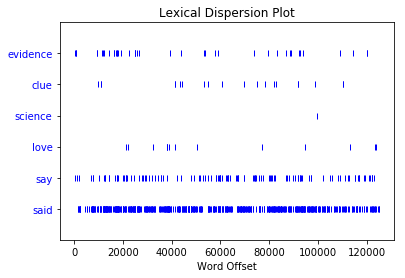

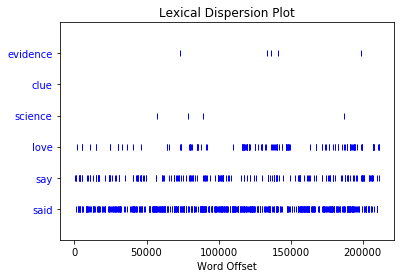

In [17]:
nltk.Text(doyle[0]).dispersion_plot(['evidence', 'clue', 'science', 'love', 'say', 'said'])
nltk.Text(bronte[0]).dispersion_plot(['evidence', 'clue', 'science', 'love', 'say', 'said'])

Looking at the above, we can see 'love' shows up far more in this Bronte text than it did in the Sherlock Holmes text. It would be even better if we could represent them on the same plot, and we can, using a slightly more complicated nltk function. If you're interested, you might try exploring NLTK's ConditionalFreqDist class.

For the sake of simplicity, we will stop there. But if you want to learn more about visualization, you'll want to explore the [matplotlib](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.01-Simple-Line-Plots.ipynb) package.

## Exercises

1. Use the above methods to find a meaningful point of comparison between the doyle corpus and the bronte corpus.
2. Read in your own text and do something interesting with it.
3. Plot multiple dispersion plots on the same plot using matplotlib.